In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



In [3]:
class Perceptron:
    # constructor
    def __init__(self):
        self.w = None
        self.b = None

    # Write a function that takes input values x as an argument and perform the weighted aggregation of inputs
    # def model(self, x):
    #     print(type(self.w))
    #     return 1 if (np.dot(self.w, x) >= self.b) else 0


    # predictor to predict on the data based on w
    def predict(self, X):
        Y = []
     # # Take random weights in your model and test the result.
     #    self.w = np.random.randint(low=10,high=100,size=X.shape[1])
     # because model function is predicting y for each x
        for i in range(X.shape[0]):
            if np.dot(self.w, X.iloc[i]) >= self.b:
                result = 1
            else:
                result = 0
            Y.append(result)
        return np.array(Y)

    # find best weights and b
    def fit(self, X, Y, epochs, lr):
        self.w = np.ones(X.shape[1])
        self.b = 0
        accuracy = {}
        max_accuracy = 0
        wt_matrix = []
        # for all epochs
        for i in range(epochs):
            # for each (x,y)
            for count in range(X.shape[0]):
                if np.dot(self.w, X.iloc[count] ) >= self.b:
                    y_pred = 1
                else:
                    y_pred=0
                # compare real class value and prediction and update weights till congestion
                if Y.iloc[count] == 1 and y_pred == 0:
                    self.w = self.w + lr * X.iloc[count]
                    self.b = self.b - lr * 1

                elif Y.iloc[count] == 0 and y_pred == 1:
                    self.w = self.w - lr * X.iloc[count]
                    self.b = self.b + lr * 1

            wt_matrix.append(self.w)
            accuracy[i] = accuracy_score(self.predict(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                chkptw = self.w
                chkptb = self.b

        # checkpoint (Save the weights and b value)
        self.w = chkptw
        self.b = chkptb
        print("max accuracy in train:")
        print(max_accuracy)

        lists= sorted(accuracy.items())
        a,b = zip(*lists)
        # plot the accuracy values over epochs
        plt.figure(figsize=(16, 8))
        plt.plot(a,b)
        plt.xlabel("Epoch #")
        plt.ylabel("Accuracy")
        # plt.ylim([0, 1])
        plt.show(block=False)



        #return the weight matrix, that contains weights over all epochs
        return np.array(wt_matrix)



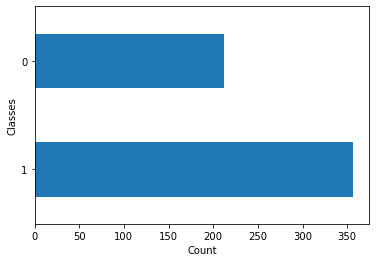

In [5]:
#load the breast cancer data
breast_cancer = sklearn.datasets.load_breast_cancer()

#convert the data to pandas dataframe
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
data["class"] = breast_cancer.target
data.head()
data.describe()

#plotting a graph to see class imbalance
data['class'].value_counts().plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("Classes")
plt.show(block= False)

#perform scaling on the data.
X = data.drop("class", axis = 1)
Y = data["class"]
X = MinMaxScaler().fit_transform(X)
X = pd.DataFrame(X, columns=data.drop("class",axis = 1).columns)

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=1)
#
# # Building Model
# perceptron = Perceptron()
# wt_matrix = perceptron.fit(X_train, Y_train, 10, 0.3)
#
# # Run and Evaluate
# # making predictions on test data
# Y_pred_test = perceptron.predict(X_test)
#
# # checking the accuracy of the model
# print("test accuracy :")
# print(accuracy_score(Y_pred_test, Y_test))


# # Further optimization
# # Vary the train-test size split and see if accuracy changes.
# for i in range(1,5):
#     test_size = i/10
#     print()
#     print("test size: %f"%test_size)
# #train test split.
#     X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, stratify=Y, random_state=1)
#
#     # Building Model
#     perceptron = Perceptron()
#     wt_matrix = perceptron.fit(X_train, Y_train, 10, 0.3)
#
#     # making predictions on test data
#     Y_pred_test = perceptron.predict(X_test)
#
#     # checking the accuracy of the model
#     print("test accuracy :")
#     print(accuracy_score(Y_pred_test, Y_test))





lr= 0.100000
max accuracy in train:
0.978515625


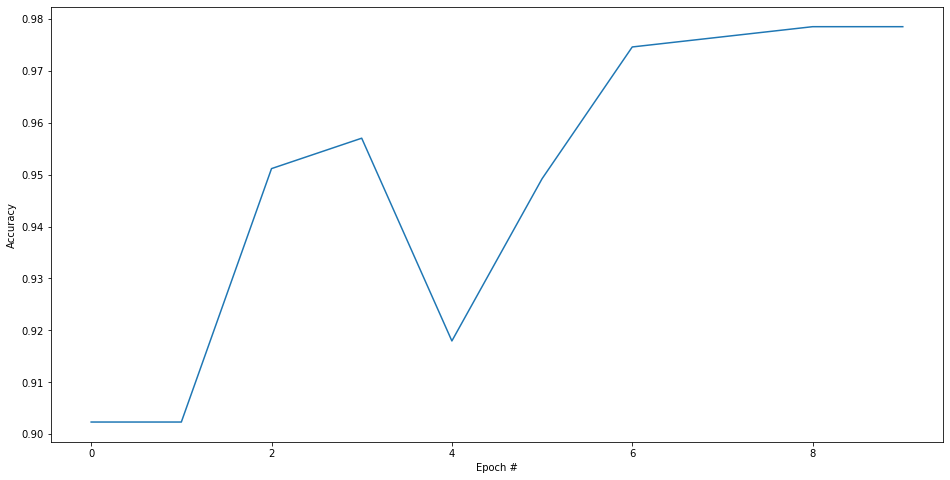

test accuracy :
0.9473684210526315
lr= 0.200000
max accuracy in train:
0.978515625


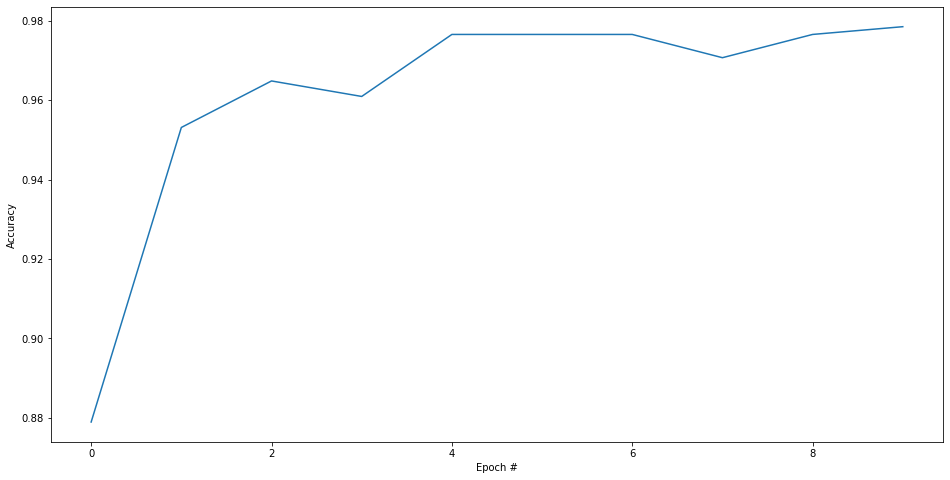

test accuracy :
0.9649122807017544
lr= 0.300000
max accuracy in train:
0.982421875


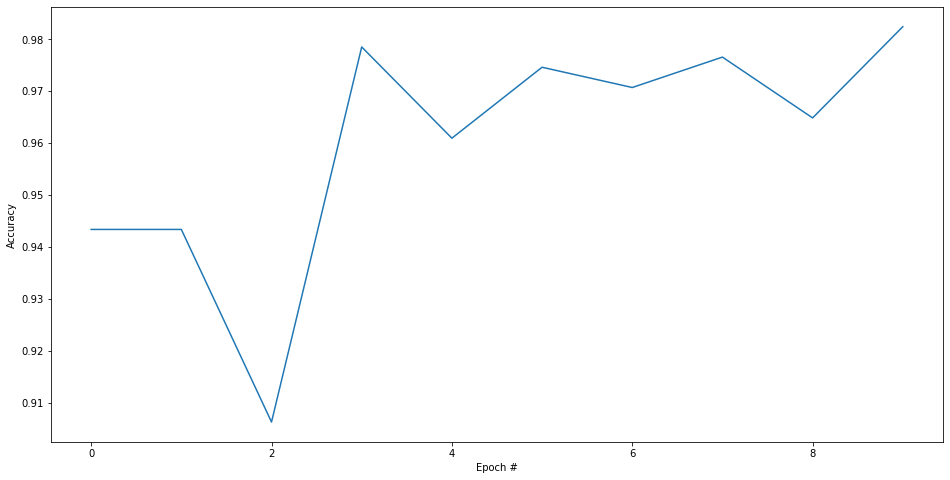

test accuracy :
0.9473684210526315


In [7]:
# Choose larger  ’learning rates’.test on the model and visualize the change in accuracy.
acc={}
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=1)
# Building Model
perceptron = Perceptron()
for i in range(1, 4):
    print("lr= %f" % (i / 10))
    wt_matrix = perceptron.fit(X_train, Y_train, 10, i / 10)

    # making predictions on test data
    Y_pred_test = perceptron.predict(X_test)

    # checking the accuracy of the model
    acc[i]=accuracy_score(Y_pred_test, Y_test)
    print("test accuracy :")
    print(accuracy_score(Y_pred_test, Y_test))




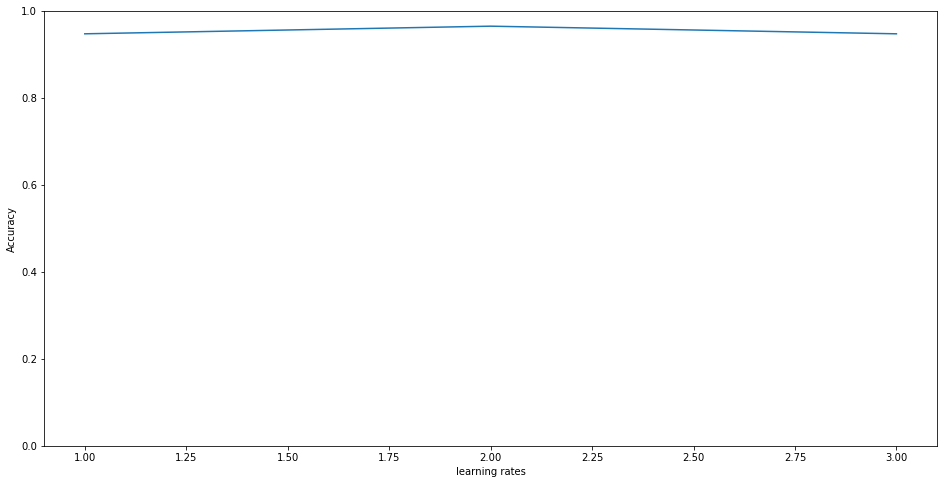

In [8]:
lists= sorted(acc.items())
a,b = zip(*lists)
# plot the accuracy values over epochs
plt.figure(figsize=(16, 8))
plt.plot(a,b)
plt.xlabel("learning rates")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.show(block=False)